### Today:
* Multiclass classification
* Softmax regression
    * Model
    * Cost function
    * Optimization

### Resources:
* Softmax regression: https://mcerovic.github.io/notes/SoftmaxRegression/index.html
* Softmax regression: http://ufldl.stanford.edu/wiki/index.php/Softmax_Regression
* Softmax function: https://medium.com/@uniqtech/understand-the-softmax-function-in-minutes-f3a59641e86d
* Multiclass classification: Patternt Recognition and Machine Learning - Bishop

# Softmax regression

In [23]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
tf.reset_default_graph()

In [24]:
# Load dataset as numpy array
data = np.loadtxt('../../data/04_SoftmaxRegression/sr_data.csv', delimiter=',')

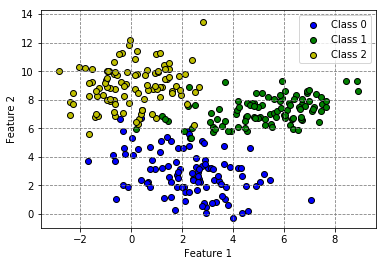

In [25]:
def plot_dataset(ax):
    # Find index of samples with class 0
    idx_0 = data[:, 2] == 0.0
    idx_1 = data[:, 2] == 1.0
    idx_2 = data[:, 2] == 2.0

    # Plot dataset
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.scatter(data[idx_0][:, 0], data[idx_0][:,1], c='b', edgecolors='k', label='Class 0')
    ax.scatter(data[idx_1][:, 0], data[idx_1][:,1], c='g', edgecolors='k', label='Class 1')
    ax.scatter(data[idx_2][:, 0], data[idx_2][:,1], c='y', edgecolors='k', label='Class 2')
    ax.grid(True, color='gray', linestyle='dashed')
    ax.legend()
    
fig, ax = plt.subplots()
plot_dataset(ax)

In [35]:
# Data parameters
n_features = 2
n_labels = 3
train_size = len(data) # 300
train_split = 0.85 # 85% data in train set, 15% in test set
split = int(train_split * train_size) # Split boundry, check for yourself!

# Training parameters
learning_rate = 0.01
training_epochs = 5000
batch_size = 100

In [36]:
# Split dataset on features and labels
x_data = data[:, :2]
print(data[:4, 2]) # y_data

y_data = tf.one_hot(data[:, 2], n_labels, dtype=tf.uint8)
# Softmax accepts labels as one hot tensor
# https://www.tensorflow.org/api_docs/python/tf/one_hot

sess = tf.Session()
print(sess.run(y_data[:4]))
sess.close()

# Split data on training and test 
x_train, x_test = x_data[:split], x_data[split:]
y_train, y_test = y_data[:split], y_data[split:]

[2. 0. 1. 2.]
[[0 0 1]
 [1 0 0]
 [0 1 0]
 [0 0 1]]


## Model

In [28]:
# Graph input
X = tf.placeholder(tf.float32, [None, n_features], "X")
y = tf.placeholder(tf.float32, [None, n_labels], "y")

# Model parameters
W = tf.Variable(tf.random_normal([n_features, n_labels]), name="W", trainable=True)
b = tf.Variable(tf.random_normal([n_labels]), name="b", trainable=True)

In [29]:
hypothesis = tf.nn.softmax(tf.add(tf.matmul(X, W), b))

## Cost

In [30]:
cost = tf.reduce_mean(-tf.reduce_sum(tf.multiply(y, tf.log(hypothesis)), axis=1))

## Optimization

In [31]:
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [32]:
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

## Train

0 3.8331244
1000 0.46693438
2000 0.3025321
3000 0.31556922
4000 0.2774965
5000 0.20887998
6000 0.25315407
7000 0.2254219
8000 0.17543705
9000 0.22584675
10000 0.20021084
11000 0.15741614
12000 0.20991361
13000 0.18491848
14000 0.14585759
Accuracy on test dataset:  0.95555556


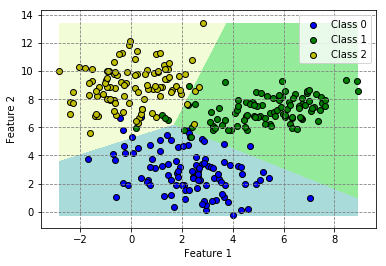

In [30]:
with tf.Session() as sess:
    
    sess.run(tf.global_variables_initializer())
    
    # 5000 * 300 / 100 = 15000
    for step in range(training_epochs * train_size // batch_size):
        
        offset = (step * batch_size) % train_size
        
        batch_data = x_train[offset:(offset + batch_size)]
        
        # feed_dict cannot use Tensor so we have to evaluate our y_train and y_test tensors
        batch_labels = y_train.eval()[offset:(offset + batch_size)]
        
        err, _ = sess.run([cost, train_op], feed_dict={X: batch_data, y: batch_labels})
        
        if step % 1000 == 0:
            print (step, err)
    
    print("Accuracy on test dataset: ", sess.run(accuracy, feed_dict={X: x_test, y: y_test.eval()}))
    
    # Create a new plot to show predictions and decision boundaries
    fig, ax = plt.subplots()
    
    # Create a grid of (x1, x2) values
    step_size = 0.01
    x1, x2 = np.meshgrid(np.arange(min(data[:, 0]), max(data[:, 0]), step_size),
                         np.arange(min(data[:, 1]), max(data[:, 1]), step_size))
    x_plot = np.vstack((x1.flatten(), x2.flatten())).T
    
    # Calculate the predictions for the whole grid
    h = sess.run(hypothesis, feed_dict={X: x_plot})
    predictions = h.argmax(axis=1).reshape([x1.shape[0], x1.shape[1]])

    # Draw a filled contour plot that shows decision boundaries
    from matplotlib.colors import LinearSegmentedColormap
    classes_cmap = LinearSegmentedColormap.from_list('classes_cmap', ['lightblue', 'lightgreen', 'lightyellow'])
    ax.contourf(x1, x2, classes, cmap=classes_cmap)
    
    # Plot the dataset on top
    plot_dataset(ax)